In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shielded_mol_py as sm

DATA_PATH = "../data"

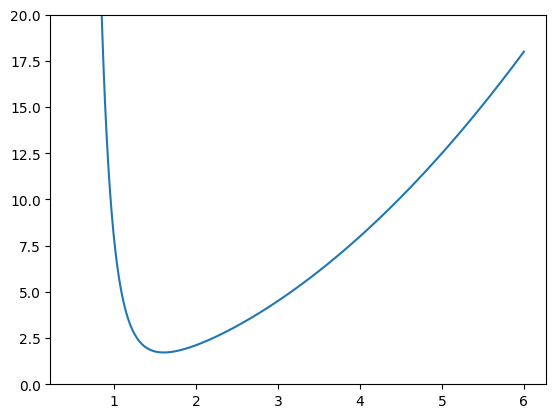

In [67]:
data = np.loadtxt(f"{DATA_PATH}/potential_value.dat", delimiter="\t", skiprows=1)
fig, ax = plt.subplots()
ax.set_ylim(0, 20)
ax.plot(data[:, 0], data[:, 1]);

In [6]:
hbar = 1.05457182e-34
epsilon_0 = 8.85418782e-12
d = 2.72 * 3.33564e-30
delta_r = 0.1
M = 1.029e-25
mu = M / 2
omega_trap = 3.5 * 2 * np.pi * 1e5
xi = 0
Omega = 40 * 2 * np.pi * 1e6
lho = np.sqrt(hbar / (mu * omega_trap))
Eho = hbar * omega_trap
C3 = d**2 / (48 * np.pi * epsilon_0 * (1 + delta_r**2)) / (Eho * lho**3)
C6 = d**4 / (128 * np.pi**2 * epsilon_0**2 * hbar * Omega * (1 + delta_r**2)**1.5) / (Eho * lho**6)

print(C3, C6)

9.25010281855974 13.543607688069887


In [8]:
l_max = 6

params = sm.SystemParams(l_max, "all", C6, C3, xi, 1, 1, 0.)
problem = sm.Problem(params, 0.6, 1.5, 6.)
problem.step_rule(1e-3, 1., 500)

bounds = problem.bound_states((0, 5), 1e-4)
for b in bounds:
    print(b.nodes, b.energy)

14 4.984092712402344
13 4.984092712402344
12 4.832906559220463
11 4.711499214172363
10 4.711499214172363
9 4.168663024902344
8 4.168663024902344
7 4.027214050292969
6 4.027214050292969
5 3.9576420092139846
4 3.233156204223633
3 3.233156204223633
2 2.7063703536987305
1 2.7063703536987305
0 2.519121639161435


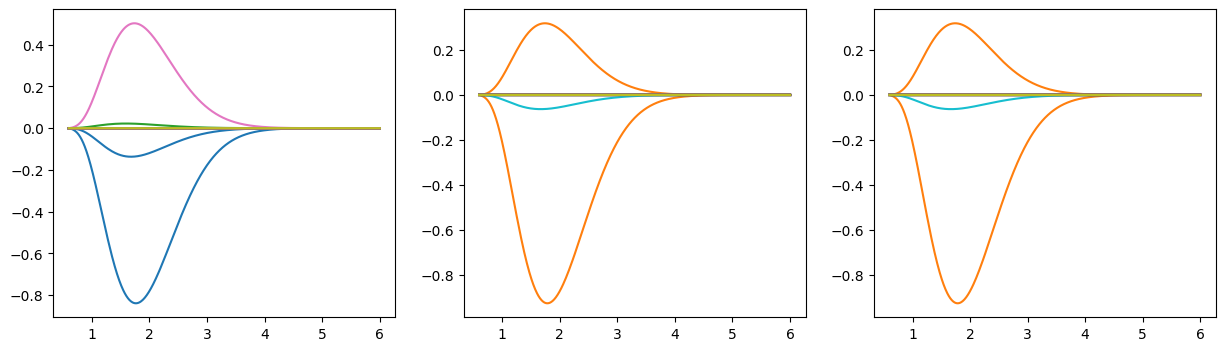

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

(r, values) = problem.wave_function(bounds[-1])
values = np.array(values)
axes[0].plot(r, values)

(r, values) = problem.wave_function(bounds[-2])
values = np.array(values)
axes[1].plot(r, values)

(r, values) = problem.wave_function(bounds[-3])
values = np.array(values)
axes[2].plot(r, values);

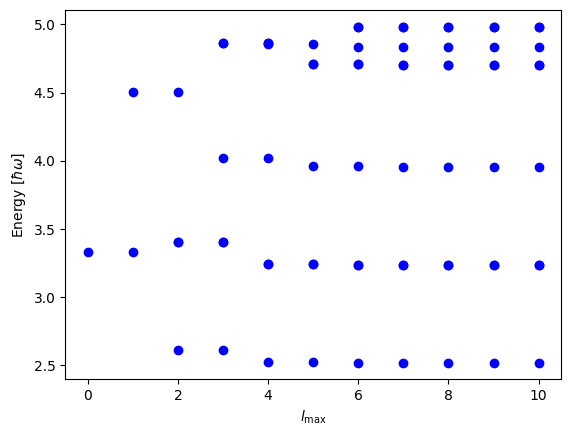

In [22]:
fig, ax = plt.subplots()
ax.set_ylabel(r"Energy [$\hbar \omega$]")
ax.set_xlabel(r"$l_\text{max}$")

for l_max in range(11):
    params = sm.SystemParams(l_max, "even", C6, C3, xi, 1, 1, 0.)
    problem = sm.Problem(params, 0.6, 1.5, 6.)
    problem.step_rule(1e-3, 1., 500)

    bounds = problem.bound_states((0, 5), 1e-4)
    bounds = np.array([[l_max, b.energy] for b in bounds])
    ax.scatter(bounds[:, 0], bounds[:, 1], color = "blue");